## Spectrum Correlograms

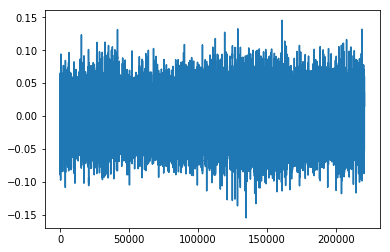

In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

helicopters = []
boats = []

sampling_rate = 44100 # All clips will be converted to this rate
duration = 5 # How much of clip to use (seconds)

data_filepath = "../Meeting-3/"

# Import raw data
for i in range(10):
    raw_data = librosa.load(data_filepath + "heli" + str(i) + "_short.wav", sr=sampling_rate, mono=False, duration=duration)
    
    # Only use one channel
    if raw_data[0].shape[0] == 2:
        raw_data = (raw_data[0][0], raw_data[1])
    helicopters.append(raw_data)
    
    raw_data = librosa.load(data_filepath + "boat" + str(i) + "_short.wav", sr=sampling_rate, mono=False, duration=duration)
    # Only use one channel
    if raw_data[0].shape[0] == 2:
        raw_data = (raw_data[0][0], raw_data[1])
    boats.append(raw_data)

plt.plot(helicopters[0][0])
plt.show()

### Helicopters

0


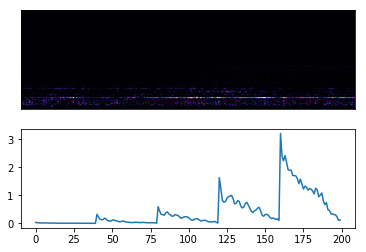

1


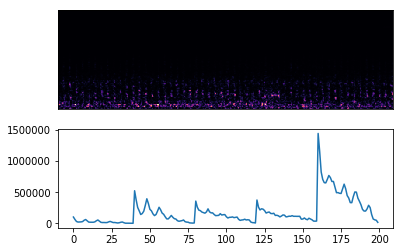

2


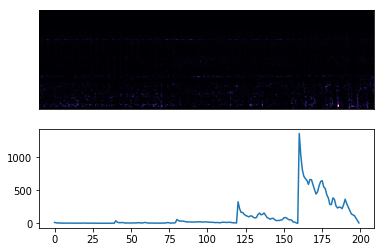

3


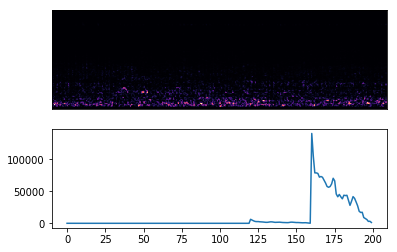

4


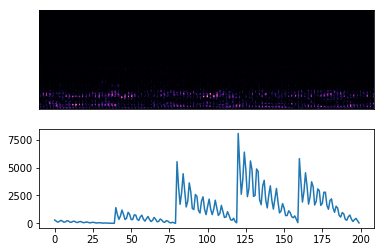

5


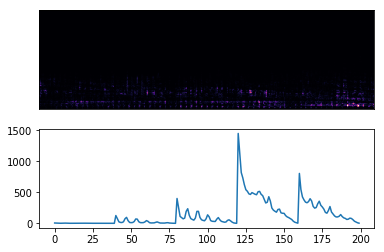

6


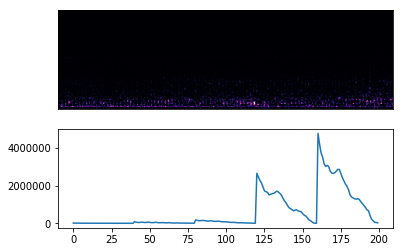

7


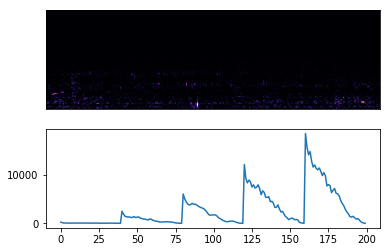

8


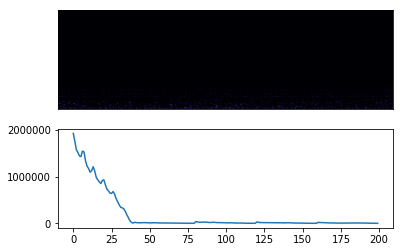

9


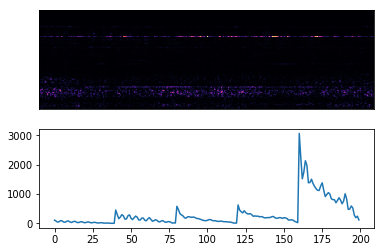

In [45]:
autocorr = []

acf_window = 40

for i in range(len(helicopters)):
    data = helicopters[i]
    
    # Generate mel spectrograms
    spec = librosa.feature.melspectrogram(data[0], sr=sampling_rate)
    
    # Generate chromagram
    #spec = librosa.feature.chroma_stft(data[0], sr=sampling_rate)
    
    # For each bin, calculate autocorrelation
    autocorr.append([])
    count_bins = spec.shape[0]
    for j in range(count_bins):
        autocorr[i].extend(librosa.core.autocorrelate(spec[j, :acf_window]))
    
    # Plot spectrogram
    print(i)
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spec)
    plt.subplot(2, 1, 2)
    plt.plot(autocorr[i][:acf_window*5])
    plt.show()

### Boats

0


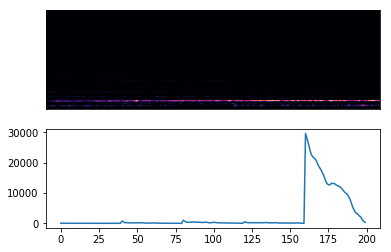

1


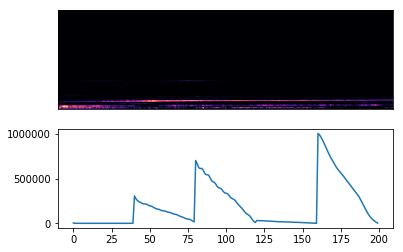

2


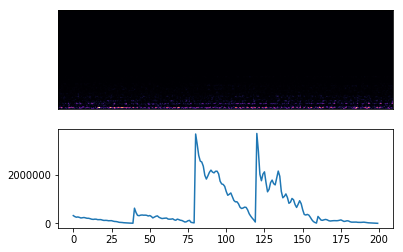

3


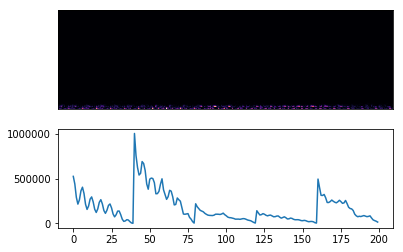

4


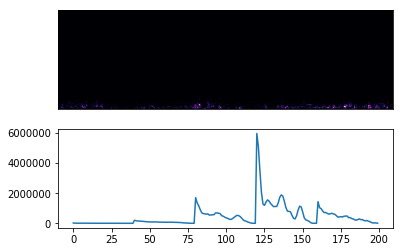

5


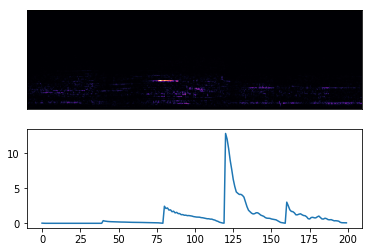

6


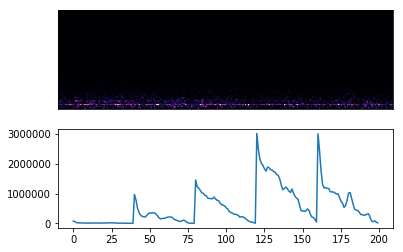

7


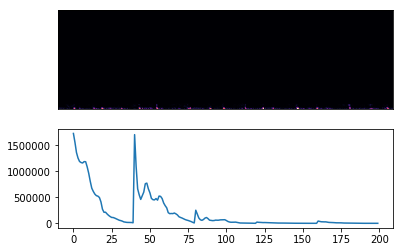

8


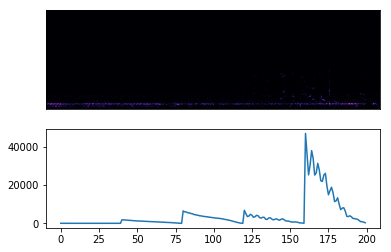

9


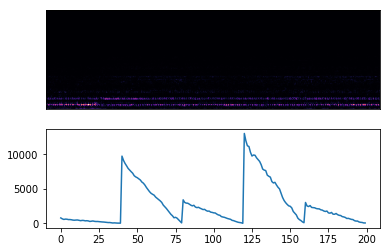

In [46]:
autocorr = []

acf_window = 40

for i in range(len(helicopters)):
    data = boats[i]
    
    # Generate mel spectrograms
    spec = librosa.feature.melspectrogram(data[0], sr=sampling_rate)
    
    # Generate chromagram
    #spec = librosa.feature.chroma_stft(data[0], sr=sampling_rate)
    
    # For each bin, calculate autocorrelation
    autocorr.append([])
    count_bins = spec.shape[0]
    for j in range(count_bins):
        autocorr[i].extend(librosa.core.autocorrelate(spec[j, :acf_window]))
    
    # Plot spectrogram
    print(i)
    plt.subplot(2, 1, 1)
    librosa.display.specshow(spec)
    plt.subplot(2, 1, 2)
    plt.plot(autocorr[i][:acf_window*5])
    plt.show()